In [98]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from yamm.constructs.trace import Trace
from yamm.utils.geo import geofence_from_trace
from yamm.maps.nx.readers.osm_readers import read_osm_nxmap
from yamm.matchers.lcss.lcss import LCSSMatcher
from yamm.utils.plot import plot_geofence, plot_trace, plot_matches, plot_map
from yamm import root
from yamm.utils.crs import XY_CRS, LATLON_CRS
from typing import List, Optional

import folium
from shapely.geometry import Point

from yamm.constructs.match import Match
from yamm.maps.map_interface import MapInterface



#functions
def match_to_road(m):
    d = {"road_id": m.road.road_id}

    metadata = m.road.metadata
    u = metadata["u"]
    v = metadata["v"]

    edge_data = road_map.g.get_edge_data(u, v)

    road_key = list(edge_data.keys())[0]

    # TODO: this should be generic over all road maps
    geom_key = road_map._geom_key

    road_geom = edge_data[road_key][geom_key]

    d["geom"] = road_geom

    return d

def match_to_coord(m):
    d = {
        "road_id": m.road.road_id,
        "geom": Point(m.coordinate.x, m.coordinate.y),
        "distance": m.distance,
    }

    return d
    



#TODO - end remove section













In [99]:
#from yamm import match_to_road

#%debug
from yamm.constructs.match import Match 
#from yamm.constructs.match import Trace
#trace = Trace.from_csv(root() / "resources/traces/sample_trace_1.csv")

trace = Trace.from_csv(root() / "resources/traces/sample_trace_1.csv")
geofence = geofence_from_trace(trace, padding=1e3) #TODO --> the fence could be insufficiently bounding points that are still being used in the dataframes.
road_map = read_osm_nxmap(geofence)
matcher = LCSSMatcher(road_map)
matches = matcher.match_trace(trace)

#TODO - remove these and make them imports
road_df = pd.DataFrame([match_to_road(m) for m in matches if m.road])
road_df = road_df.loc[road_df.road_id.shift() != road_df.road_id]
road_gdf = gpd.GeoDataFrame(road_df, geometry=road_df.geom, crs=XY_CRS).drop(
    columns=["geom"]
)
road_gdf = road_gdf.to_crs(LATLON_CRS)

coord_df = pd.DataFrame([match_to_coord(m) for m in matches if m.road])

coord_gdf = gpd.GeoDataFrame(coord_df, geometry=coord_df.geom, crs=XY_CRS).drop(
    columns=["geom"]
)

coord_gdf = coord_gdf.to_crs(LATLON_CRS) # convert coordinates to latlon_crs format.

mid_i = int(len(coord_gdf) / 2)
mid_coord = coord_gdf.iloc[mid_i].geometry


2022-05-02 13:17:45 Projected GeoDataFrame to +proj=utm +zone=13 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2022-05-02 13:17:45 Projected GeoDataFrame to epsg:4326
2022-05-02 13:17:45 Projected GeoDataFrame to +proj=utm +zone=13 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2022-05-02 13:17:45 Projected GeoDataFrame to epsg:4326
2022-05-02 13:17:45 Requesting data within polygon from API in 1 request(s)
2022-05-02 13:17:46 Retrieved response from cache file "cache/86ec9f7f80ae37122482ffc8cd535a439b2770b3.json"
2022-05-02 13:17:46 Got all network data within polygon from API in 1 request(s)
2022-05-02 13:17:46 Creating graph from downloaded OSM data...
2022-05-02 13:17:46 Created graph with 15260 nodes and 28200 edges
2022-05-02 13:17:46 Added length attributes to graph edges
2022-05-02 13:17:46 Identifying all nodes that lie outside the polygon...
2022-05-02 13:17:48 Created nodes GeoDataFrame from graph
2022-05-02 13:17:48 Created r-tree spatial index for 15260 geom

In [100]:
road_gdf

,road_id,geometry
0,432968976-432968864,"LINESTRING (-104.91803 39.65363, -104.91837 39..."
10,432968864-176066679,"LINESTRING (-104.92053 39.65817, -104.92085 39..."
31,176066679-442605942,"LINESTRING (-104.92327 39.66422, -104.92360 39..."
58,442605942-442615878,"LINESTRING (-104.92787 39.67099, -104.92859 39..."
74,442615878-442618319,"LINESTRING (-104.93071 39.67503, -104.93155 39..."
...,...,...
889,176070487-176080693,"LINESTRING (-104.95672 39.74382, -104.95660 39..."
903,176080693-176080695,"LINESTRING (-104.95479 39.74381, -104.95442 39..."
911,176080695-176080696,"LINESTRING (-104.95359 39.74380, -104.95347 39..."
919,176080696-176080697,"LINESTRING (-104.95247 39.74380, -104.95187 39..."


In [101]:



y = coord_df.distance # the distances from the expected line. Deviance. 
x = [x for x in range(0,len(y))] # create blanks for x axis
#y = np.exp(np.sin(x))


In [102]:
coord_df.describe()
ending = coord_df.tail()
ending

# why is bounding box wrong?

# why are the points outside the box?

,road_id,geom,distance,geometry
1048,176080697-176071359,POINT (-11683165.126469797 4828627.066903026),43.508234,POINT (-11683165.126 4828627.067)
1049,176080697-176071359,POINT (-11683165.126469797 4828627.066903026),43.508234,POINT (-11683165.126 4828627.067)
1050,176080697-176071359,POINT (-11683165.126469797 4828627.066903026),43.508234,POINT (-11683165.126 4828627.067)
1051,176080697-176071359,POINT (-11683165.126469797 4828627.066903026),43.508234,POINT (-11683165.126 4828627.067)
1052,176080697-176071359,POINT (-11683165.126469797 4828627.066903026),43.508234,POINT (-11683165.126 4828627.067)


In [103]:

for coord in coord_gdf.itertuples():
    x_coord = coord.geometry.x
    y_coord = coord.geometry.y
    
for road in road_gdf.itertuples():
    full_line = [(lat, lon) for lon, lat in road.geometry.coords]



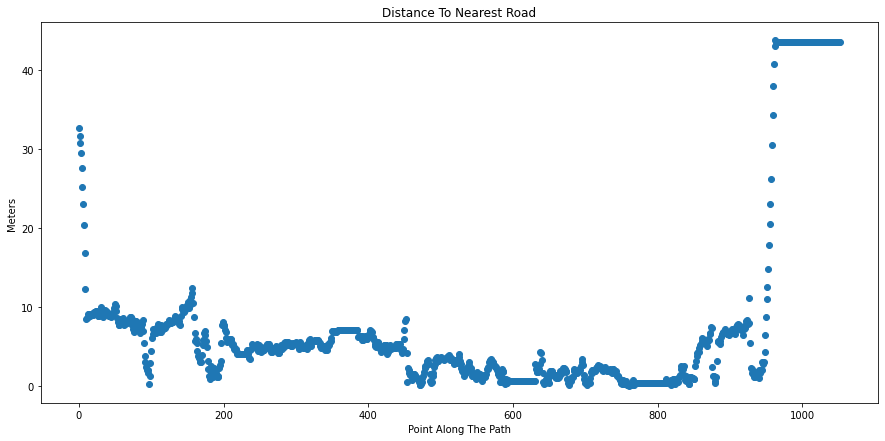

In [112]:
plt.figure(figsize=(15, 7))
plt.autoscale(enable=True)
#plt.stem(x, y)
plt.scatter(x,y)
plt.title('Distance To Nearest Road')
plt.ylabel('Meters')
plt.xlabel('Point Along The Path')
plt.show()

In [113]:
#testing section!pip install altair
!pip install geopy

     |████████████████████████████████| 118 kB 3.4 MB/s 


In [ ]:
# Goals for future Dev

'''

The score of a match could potentially be linked to the speed of the vehicle (time between measured points) 
and the average speed of the predicted road. 

'''